# Machine Learning Project

 1) data curation: how you choose the features (X) and the target (Y)
 2) exploratory data analysis (including visualization and correlation matrix)
 3) univariate results (and meta analysis)
 4) multivariate results (and meta analysis)
 5) benchmark linear/logistic regressions (including higher-order polynomials and/or interaction terms)
 6) one machine learning algorithm (e.g., random forests or boosting)
 7) k-fold cross-validation 
 8) performance evaluation (R-squared, AUROC, etc.)
 9) key features (dimension reduction and feature selection techniques if necessary)
 10) synthetic interpretation of results

## Introduction

For my Project I choose a **Airplane Engine Dataset** which has **27** columns and **20631** entries for the train dataset The test dataset contains **11939** entries. 
The dataset contains the following columns:
- id: Engine ID, 
- cycle: Cycle number,
- setting1-3: Engine setting 1-3,
- s1-s21: Sensor measurements s1-s21,
- Y: Binary target label indicating engine swap (1: needs swapping, 0: does not need swapping).

## Importing libraries

In [121]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from prompt_toolkit.key_binding.bindings.named_commands import yank_last_arg
from sklearn.linear_model import LinearRegression

## Load and clear up dataset

### 1) Load and edit the Dataset

In [122]:
# Load the dataset
dataset_train = pd.read_csv("PM_train.csv")
dataset_test = pd.read_csv("PM_test.csv")

# Shift the cycle column forward by 1 to identify the last cycle before it resets
dataset_train['Y'] = (dataset_train['cycle'] == dataset_train.groupby('id')['cycle'].transform('max')).astype(int)
dataset_test['Y'] = (dataset_test['cycle'] == dataset_test.groupby('id')['cycle'].transform('max')).astype(int)

# Define selected columns, including 'Y'
selected_columns = ['id', 'cycle', 'setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21', 'Y']

# Select the subset of data
selected_dataset_train = dataset_train[selected_columns]
selected_dataset_test = dataset_test[selected_columns]

## Save the selected dataset to an Excel file
# selected_dataset.to_excel("selected_dataset_with_Y.xlsx", index=False)

# Sort by 'id' and 'cycle' to ensure the data is in the correct order
dataset_train = dataset_train.sort_values(['id', 'cycle'])
dataset_test = dataset_test.sort_values(['id', 'cycle'])

# Group by 'id' and select the last 10 cycles for each 'id'
last_10_cycles_train = dataset_train.groupby('id').tail(10)
last_10_cycles_test = dataset_test.groupby('id').tail(10)

# Further filter the selected columns for this subset
selected_last_10_cycles_train = last_10_cycles_train[selected_columns]
selected_last_10_cycles_test = last_10_cycles_test[selected_columns]

# Display the result
selected_last_10_cycles_train.head()
selected_last_10_cycles_test.head()

# Define the features (X) and target (Y)
X_train = selected_dataset_train # .drop(columns=['Y', 'id', 'cycle'])  # Drop 'Y', 'id', and 'cycle' if they are not part of the model
Y_train = selected_dataset_train['Y']
X_test = selected_dataset_test #.drop(columns=['Y', 'id', 'cycle'])  # Drop 'Y', 'id', and 'cycle' if they are not part of the model
Y_test = selected_dataset_test['Y']

# Alternatively, if using only the last 10 cycles:
X_last_10_train = selected_last_10_cycles_train.drop(columns=['Y', 'id', 'cycle'])
Y_last_10_train = selected_last_10_cycles_train['Y']
X_last_10_test = selected_last_10_cycles_test.drop(columns=['Y', 'id', 'cycle'])
Y_last_10_test = selected_last_10_cycles_test['Y']


After visualizing the dataset, I decided to use the following columns as features:
- id: Engine ID,
- cycle: Cycle number,
- setting1: Engine setting 1,
- setting2: Engine setting 2,
- s2: Sensor measurement 2,
- s3: Sensor measurement 3,
- s4: Sensor measurement 4,
- s6: Sensor measurement 6,
- s7: Sensor measurement 7,
- s8: Sensor measurement 8,
- s9: Sensor measurement 9,
- s11: Sensor measurement 11,
- s12: Sensor measurement 12,
- s13: Sensor measurement 13,
- s14: Sensor measurement 14,
- s15: Sensor measurement 15,
- s17: Sensor measurement 17,
- s20: Sensor measurement 20,
- s21: Sensor measurement 21,
- Y: Binary target label indicating engine swap (1: needs swapping, 0: does not need swapping). Which I created on my own by using the last value before the id goes up by one.   

The reason for this is that these values are the most relevant for the prediction of the target label 'Y' because the other columns are null values and don't change.
 

### 2.1) Visualization of the whole Dataset

In [123]:
# # Visualization 
# selected_dataset_train.head()
# selected_dataset_train.info()
# 
# for column in selected_dataset_train.columns:
#     if column not in ['id', 'Y']:  # Skip 'id' and 'Y' for this general visualization
#         plt.figure(figsize=(10, 5))
#         plt.title(f"Distribution of {column}")
#         plt.plot(selected_dataset_train['cycle'], selected_dataset_train[column], alpha=0.7)
#         plt.xlabel("Cycle")
#         plt.ylabel(column)
#         plt.grid(True, alpha=0.5)
#         plt.show()


I this part I visualized the whole dataset and the distribution of the columns in the dataset. To get a rough view about the dataset.

### 2.2) Visualization of the last 10 cycles

In [124]:
# selected_last_10_cycles_train.head()
# selected_last_10_cycles_train.info()
# 
# for column in selected_last_10_cycles_train.columns:
#     if column not in ['id', 'Y']:  # Skip 'id' and 'Y' for this general visualization
#         plt.figure(figsize=(10, 5))
#         plt.title(f"Distribution of {column}")
#         plt.plot(selected_last_10_cycles_train['cycle'], selected_last_10_cycles_train[column], alpha=0.7)
#         plt.xlabel("Cycle")
#         plt.ylabel(column)
#         plt.grid(True, alpha=0.5)
#         plt.show()

I this part I visualized the last 10 cycles of the dataset and the distribution of the columns in the dataset. To get a more narrow insight about the dataset.

### 3) Scatter Plot Matrix

In [125]:
# # Heatmap
# plt.figure(figsize=(12, 10))
# correlation_matrix = selected_last_10_cycles_train.corr()  # Compute the correlation matrix
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix Heatmap (Last 10 Cycles)')
# plt.show()
# 
# # Scatter plot matrix
# numeric_columns = [col for col in selected_columns if col not in ['id', 'Y', 'cycle']]
# sns.pairplot(selected_last_10_cycles_train, vars=numeric_columns[:20])  # Limit to first 6 for clarity
# plt.suptitle('Scatter Plot Matrix (Last 10 Cycles)', y=1.02)
# plt.show()
# 
# # 3D Scatter Plot
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(
#     selected_last_10_cycles_train['setting1'],
#     selected_last_10_cycles_train['s2'],
#     selected_last_10_cycles_train['s3'],
#     c='b', marker='o'
# )
# 
# # Label the axes
# ax.set_xlabel('Setting 1')
# ax.set_ylabel('S2')
# ax.set_zlabel('S3')
# plt.title('3D Scatter Plot (Last 10 Cycles)')
# plt.show()

### 4) Linear Regression

In [133]:
from sklearn.metrics import accuracy_score, classification_report, r2_score
from sklearn.linear_model import LinearRegression

# Fit the regression model
model = LinearRegression()
# model.fit(X_train, Y_train)
model.fit(X_last_10_train, Y_last_10_train)

# Define the threshold for binary classification
threshold = 0

# Predict using the regression model
y_pred = model.predict(X_last_10_test)

print(y_pred.min(), y_pred.max())

# Convert regression outputs and true labels to binary
y_test_binary = selected_last_10_cycles_test['Y']
y_pred_binary = (y_pred <= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test_binary, y_pred_binary)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test_binary, y_pred_binary))

-1.6841581452790706 0.19697901928429928
Accuracy: 0.10326086956521739
              precision    recall  f1-score   support

           0       0.64      0.01      0.02       828
           1       0.10      0.96      0.18        92

    accuracy                           0.10       920
   macro avg       0.37      0.48      0.10       920
weighted avg       0.58      0.10      0.03       920



### 5) Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3918
           1       0.87      0.82      0.84       209

    accuracy                           0.98      4127
   macro avg       0.93      0.91      0.92      4127
weighted avg       0.98      0.98      0.98      4127

ROC-AUC Score: 0.9958075963959738
Mean Cross-Validation AUC: 0.9929789733679174
True Positives (TP): 186
False Positives (FP): 36
True Negatives (TN): 3882
False Negatives (FN): 23

Confusion Matrix:
[[3893   25]
 [  38  171]]

AUROC: 0.9958075963959738


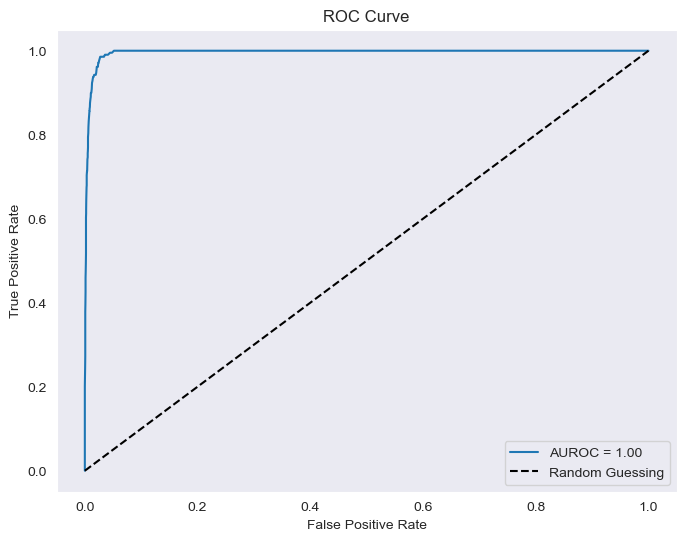

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

# Step 1: Create target labels indicating engine swap (1: needs swapping, 0: does not need swapping)
threshold = 10  # Define the threshold for remaining cycles
train_data['RUL'] = train_data.groupby('id')['cycle'].transform(max) - train_data['cycle']
train_data['Y'] = (train_data['RUL'] <= threshold).astype(int)

# Step 2: Define features (X) and target (Y)
features = train_data.columns.difference(['id', 'cycle', 'RUL', 'Y'])
X = train_data[features]
y = train_data['Y']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Random Forest Classifier with Cross-Validation
rf = RandomForestClassifier(random_state=42, n_estimators=100)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')

# Fit the model
rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Performance Metrics
classification_report_result = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print("Classification Report:\n", classification_report_result)
print("ROC-AUC Score:", roc_auc)
print("Mean Cross-Validation AUC:", cv_scores.mean())

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Extract TP, FP, FN, TN from the confusion matrix
TN_nn, FP_nn, FN_nn, TP_nn = conf_matrix_nn.ravel()

# Print the TP/FP breakdown
print(f"True Positives (TP): {TP_nn}")
print(f"False Positives (FP): {FP_nn}")
print(f"True Negatives (TN): {TN_nn}")
print(f"False Negatives (FN): {FN_nn}")

# Optionally, display the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix_rf)

auroc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUROC: {auroc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUROC = {auroc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Gradient Boosting

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3918
           1       0.85      0.84      0.85       209

    accuracy                           0.98      4127
   macro avg       0.92      0.91      0.92      4127
weighted avg       0.98      0.98      0.98      4127

ROC-AUC Score: 0.9958649931246046
Mean Cross-Validation AUC: 0.9943795561560238
True Positives (TP): 175
False Positives (FP): 30
True Negatives (TN): 3888
False Negatives (FN): 34

Confusion Matrix:
[[3888   30]
 [  34  175]]

AUROC: 0.9958649931246046


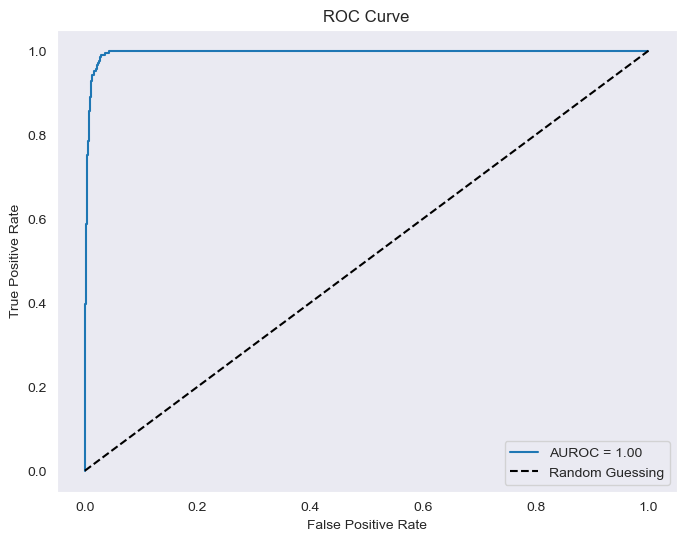

In [128]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the Features (Gradient Boosting may not require scaling, but it can help in some cases)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the Gradient Boosting Classifier
xgb = XGBClassifier(
    n_estimators=100,          # Number of trees
    learning_rate=0.1,         # Step size for each iteration
    max_depth=3,               # Maximum tree depth
    subsample=0.8,             # Fraction of samples used for training each tree
    colsample_bytree=0.8,      # Fraction of features used for training each tree
    random_state=42            # For reproducibility
)

# Step 3: Cross-Validation
cv_scores = cross_val_score(xgb, X_train_scaled, y_train, cv=5, scoring='roc_auc')

# Step 4: Train the Model
xgb.fit(X_train_scaled, y_train)

# Step 5: Make Predictions
y_pred = xgb.predict(X_test_scaled)
y_pred_proba = xgb.predict_proba(X_test_scaled)[:, 1]

# Step 6: Evaluate the Model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Mean Cross-Validation AUC:", cv_scores.mean())

# Generate the confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred)

# Extract TP, FP, FN, TN from the confusion matrix
TN_nn, FP_nn, FN_nn, TP_nn = conf_matrix_gb.ravel()

# Print the TP/FP breakdown
print(f"True Positives (TP): {TP_nn}")
print(f"False Positives (FP): {FP_nn}")
print(f"True Negatives (TN): {TN_nn}")
print(f"False Negatives (FN): {FN_nn}")

# Optionally, display the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix_gb)

auroc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUROC: {auroc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUROC = {auroc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 5.3 Neural Networks (Test)

Epoch 1/100
413/413 [==============================] - 0s 684us/step - loss: 0.1568 - accuracy: 0.9468 - val_loss: 0.0783 - val_accuracy: 0.9661
Epoch 2/100
413/413 [==============================] - 0s 545us/step - loss: 0.0805 - accuracy: 0.9640 - val_loss: 0.0686 - val_accuracy: 0.9679
Epoch 3/100
413/413 [==============================] - 0s 543us/step - loss: 0.0702 - accuracy: 0.9680 - val_loss: 0.0654 - val_accuracy: 0.9691
Epoch 4/100
413/413 [==============================] - 0s 565us/step - loss: 0.0647 - accuracy: 0.9704 - val_loss: 0.0595 - val_accuracy: 0.9739
Epoch 5/100
413/413 [==============================] - 0s 559us/step - loss: 0.0623 - accuracy: 0.9708 - val_loss: 0.0552 - val_accuracy: 0.9764
Epoch 6/100
413/413 [==============================] - 0s 562us/step - loss: 0.0566 - accuracy: 0.9761 - val_loss: 0.0613 - val_accuracy: 0.9712
Epoch 7/100
413/413 [==============================] - 0s 533us/step - loss: 0.0573 - accuracy: 0.9746 - val_loss: 0.0563 - val_ac

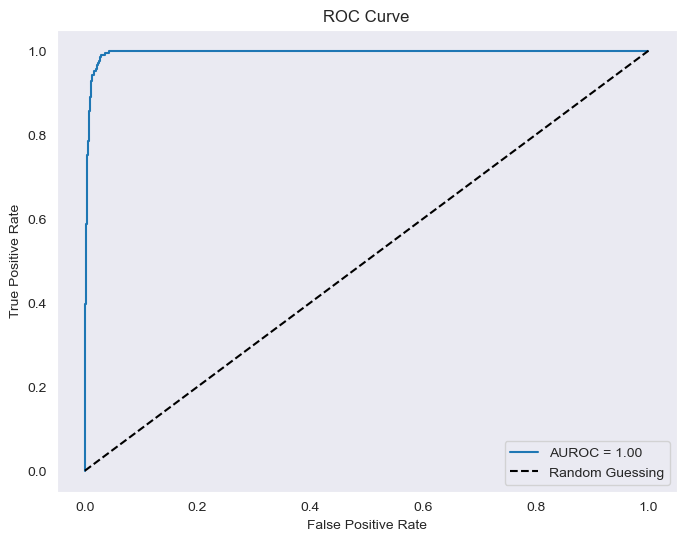

In [129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# Step 1: Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Build the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.3),  # Add dropout for regularization
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Step 4: Evaluate the Model
y_pred_proba_nn = model.predict(X_test_scaled)
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)

# Performance Metrics
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_nn))

# Generate the confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

# Extract TP, FP, FN, TN from the confusion matrix
TN_nn, FP_nn, FN_nn, TP_nn = conf_matrix_nn.ravel()

# Print the TP/FP breakdown
print(f"True Positives (TP): {TP_nn}")
print(f"False Positives (FP): {FP_nn}")
print(f"True Negatives (TN): {TN_nn}")
print(f"False Negatives (FN): {FN_nn}")

# Optionally, display the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix_nn)

auroc = roc_auc_score(y_test, y_pred_proba_nn)
print(f"AUROC: {auroc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUROC = {auroc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()